# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** B

**Names:**

* Vincenzo Bazzucchi
* Amaury Combes
* Alexis Montavon

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [2]:
import networkx as nx
import json
import epidemics_helper
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Import the data
def graph_from_json(pathname):
    json_file = open(pathname, 'r')
    data = json.load(json_file)
    json_file.close()
    G = nx.Graph()
    for node in data['nodes']:
        G.add_node(node['id'], coordinates=node['coordinates'])
    for edge in data['links']:
        G.add_edge(edge['source'], edge['target'])
    return G

In [4]:
G = graph_from_json('../data/nyc_augmented_network.json')

In [5]:
beta = 10.0
gamma = 0.1
max_time = 100.0
sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)

In [6]:
sir.launch_epidemic(source=23654, max_time=max_time)

Epidemic stopped after 101.77 days | 101.77 days elapsed | 0.2% susceptible, 0.0% infected, 99.8% recovered


In [12]:
# Do you agree?
infected_by_day = np.zeros(110)
recovered_by_day = np.zeros(110)
n = len(G)
for node in range(n):
    infection_time = sir.inf_time[node]
    if infection_time != np.inf:
        infected_by_day[int(infection_time)] += 1
    recover_time = sir.rec_time[node]
    if recover_time != np.inf:
        recovered_by_day[int(recover_time)] += 1

for t in range(1, len(infected_by_day)):
    infected_by_day[t] = infected_by_day[t] + infected_by_day[t-1] - recovered_by_day[t]
    recovered_by_day[t] = recovered_by_day[t] + recovered_by_day[t-1] # Same as then
    
infected_by_day = (100. * infected_by_day) / n
recovered_by_day = (100. * recovered_by_day) / n

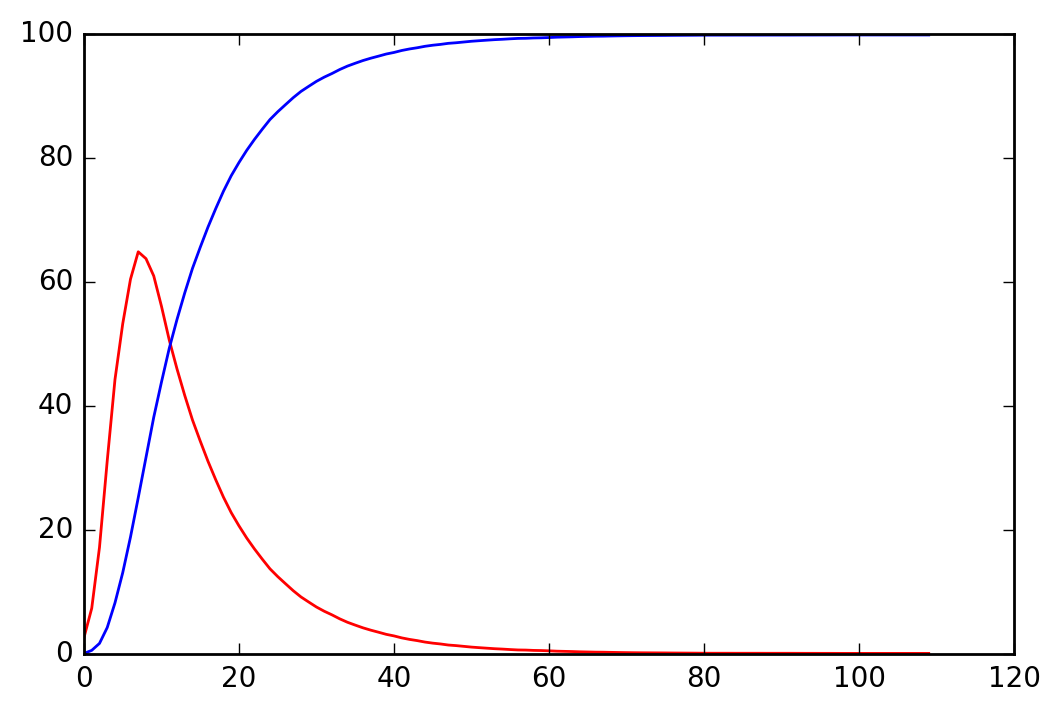

In [13]:
plt.plot(infected_by_day, 'r')
plt.plot(recovered_by_day, 'b') # Is the blue graph correct?
# Missing susceptible by time

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

#### Exercise 2.11: Strategy 2